In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_sales = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [3]:
####  DATA INSPECTION #### 


In [4]:
#Checking the size of the data
df_sales.shape

(7560, 6)

In [5]:
df_sales.tail(10)

,Date,Time,State,Group,Unit,Sales
7550,30-Dec-2020,Morning,TAS,Women,14,35000
7551,30-Dec-2020,Morning,TAS,Seniors,11,27500
7552,30-Dec-2020,Afternoon,TAS,Kids,6,15000
7553,30-Dec-2020,Afternoon,TAS,Men,15,37500
7554,30-Dec-2020,Afternoon,TAS,Women,10,25000
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [6]:
df_sales.head(15)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
5,1-Oct-2020,Afternoon,WA,Men,10,25000
6,1-Oct-2020,Afternoon,WA,Women,3,7500
7,1-Oct-2020,Afternoon,WA,Seniors,11,27500
8,1-Oct-2020,Evening,WA,Kids,15,37500
9,1-Oct-2020,Evening,WA,Men,15,37500


In [7]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [8]:
df_sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [9]:
df_sales.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [10]:
df_sales.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [11]:
num = ['Unit', 'Sales']
date = ['Date']
cat = [col for col in df_sales.columns if col not in num + date]

In [12]:
cat

['Time', 'State', 'Group']

In [13]:
 num

['Unit', 'Sales']

In [14]:
df_sales.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [15]:
for col in cat:
    print("Number of Unique values")
    print(f"{col} Column")
    print(f"Number of Unique Column: {df_sales[col].nunique()}")
    print("---------------------------------------------------------")
    print(f"Unique values: {df_sales[col].unique()}") 
    print(f"total number of data: {df_sales[col].value_counts()}")

Number of Unique values
Time Column
Number of Unique Column: 3
---------------------------------------------------------
Unique values: [' Morning' ' Afternoon' ' Evening']
total number of data: Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64
Number of Unique values
State Column
Number of Unique Column: 7
---------------------------------------------------------
Unique values: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
total number of data: State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64
Number of Unique values
Group Column
Number of Unique Column: 4
---------------------------------------------------------
Unique values: [' Kids' ' Men' ' Women' ' Seniors']
total number of data: Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64


In [16]:
for col in cat:
    print("---------------------------------------------------------")
    print(f"'{col}' Column")
    num_unique = df_sales[col].nunique()
    total_values = df_sales[col].shape[0]
    print(f"Number of Unique values: {num_unique}")
    print(f"Unique values: {df_sales[col].unique()}")
    print(f"Value counts:\n{df_sales[col].value_counts()}")
    has_duplicates = num_unique < total_values
    dupes_list = df_sales[col][df_sales[col].duplicated(keep=False)].unique()
    print(dupes_list)


---------------------------------------------------------
'Time' Column
Number of Unique values: 3
Unique values: [' Morning' ' Afternoon' ' Evening']
Value counts:
Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64
[' Morning' ' Afternoon' ' Evening']
---------------------------------------------------------
'State' Column
Number of Unique values: 7
Unique values: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
Value counts:
State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
---------------------------------------------------------
'Group' Column
Number of Unique values: 4
Unique values: [' Kids' ' Men' ' Women' ' Seniors']
Value counts:
Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64
[' Kids' ' Men' ' Women' ' Seniors']


In [17]:
for col in cat:
    print(f"Column: {col}")
    
    dupes = df_sales[col][df_sales[col].duplicated(keep=False)]
    unique_dupes = dupes.unique()
    if len(unique_dupes) > 0:
        print("Duplicate values:", unique_dupes)
    else:
        print("No duplicate values found.")
    print("---------------------------------------------------------")


Column: Time
Duplicate values: [' Morning' ' Afternoon' ' Evening']
---------------------------------------------------------
Column: State
Duplicate values: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
---------------------------------------------------------
Column: Group
Duplicate values: [' Kids' ' Men' ' Women' ' Seniors']
---------------------------------------------------------


In [98]:
df_sales.groupby('Time')['Unit'].agg([ 'count', 'sum', 'mean', 'min', 'max'])
df_sales

,Date,Time,State,Group,Unit,Sales,Month,Month_Name
0,2020-10-01,Morning,WA,Kids,8,20000,10,October
1,2020-10-01,Morning,WA,Men,8,20000,10,October
2,2020-10-01,Morning,WA,Women,4,10000,10,October
3,2020-10-01,Morning,WA,Seniors,15,37500,10,October
4,2020-10-01,Afternoon,WA,Kids,3,7500,10,October
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,12,December
7556,2020-12-30,Evening,TAS,Kids,15,37500,12,December
7557,2020-12-30,Evening,TAS,Men,15,37500,12,December
7558,2020-12-30,Evening,TAS,Women,11,27500,12,December


In [99]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7560 non-null   datetime64[ns]
 1   Time        7560 non-null   object        
 2   State       7560 non-null   object        
 3   Group       7560 non-null   object        
 4   Unit        7560 non-null   int64         
 5   Sales       7560 non-null   int64         
 6   Month       7560 non-null   int32         
 7   Month_Name  7560 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 443.1+ KB


sales_distribution.reset_index()

In [114]:

df_sales['Time'] = df_sales['Time'].str.strip()

df_sales.groupby('Time')['Sales'].agg(['count', 'sum', 'mean', 'min', 'max'])

order = ['Morning', 'Afternoon', 'Evening']

df_sales.index = pd.CategoricalIndex(sales_distribution.index, categories=order, ordered=True)


df_sales = df_sales.sort_index()

print(df_sales)


ValueError: Length mismatch: Expected axis has 7560 elements, new values have 3 elements

In [59]:
for col in cat:
    print("---------------------------------------------------------")
    print(f"'{col}' Column")
    
   
    df_sales[col] = df_sales[col].astype(str).str.strip()
    
    num_unique = df_sales[col].nunique()
    total_values = df_sales[col].shape[0]
    print(f"Number of Unique values: {num_unique}")
    print(f"Unique values: {df_sales[col].unique()}")
    print(f"Value counts:\n{df_sales[col].value_counts()}")
    has_duplicates = num_unique < total_values
    print(f"Contains duplicates? {'Yes' if has_duplicates else 'No'}")
    
   
    dupes_list = df_sales[col][df_sales[col].duplicated(keep=False)].unique()
    if len(dupes_list) > 0:
        print(f"Duplicate values: {dupes_list}")
    else:
        print("No duplicate values found.")


---------------------------------------------------------
'Time' Column
Number of Unique values: 3
Unique values: ['Morning' 'Afternoon' 'Evening']
Value counts:
Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64
Contains duplicates? Yes
Duplicate values: ['Morning' 'Afternoon' 'Evening']
---------------------------------------------------------
'State' Column
Number of Unique values: 7
Unique values: ['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']
Value counts:
State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64
Contains duplicates? Yes
Duplicate values: ['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS']
---------------------------------------------------------
'Group' Column
Number of Unique values: 4
Unique values: ['Kids' 'Men' 'Women' 'Seniors']
Value counts:
Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64
Contains duplicates? Yes
Duplicate values: ['Kid

In [101]:
df_sales[col] = df_sales[col].astype(str).str.strip()
df_sales

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7560 non-null   datetime64[ns]
 1   Time        7560 non-null   object        
 2   State       7560 non-null   object        
 3   Group       7560 non-null   object        
 4   Unit        7560 non-null   int64         
 5   Sales       7560 non-null   int64         
 6   Month       7560 non-null   int32         
 7   Month_Name  7560 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(4)
memory usage: 443.1+ KB


In [102]:
cat

['Time', 'State', 'Group']

In [107]:
time_sales_dis.reset_index()

,Time,sum,mean,min,max
0,Afternoon,114007500,45241.071429,5000,162500
1,Evening,112087500,44479.166667,5000,162500
2,Morning,114207500,45320.436508,5000,162500


In [116]:
time_sales_dis = df_sales.groupby('Time')['Sales'].agg(['sum', 'mean', 'min', 'max'])
time_sales_dis

C:\Users\Jeeva\AppData\Local\Temp\ipykernel_37088\2818000119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_sales_dis = df_sales.groupby('Time')['Sales'].agg(['sum', 'mean', 'min', 'max'])


,sum,mean,min,max
Time,,,,
Morning,114207500,45320.436508,5000,162500
Afternoon,114007500,45241.071429,5000,162500
Evening,112087500,44479.166667,5000,162500


In [118]:
Time_sales['Time'].unique()

NameError: name 'Time_sales' is not defined

In [109]:
from pandas.api.types import CategoricalDtype

In [115]:
# Ensure 'Time' is stripped and categorical for correct ordering
df_sales['Time'] = df_sales['Time'].str.strip()
order = ['Morning', 'Afternoon', 'Evening']
df_sales['Time'] = pd.Categorical(df_sales['Time'], categories=order, ordered=True)

# Group by both 'State' and 'Time'
time_order = (
    df_sales
    .groupby(['State', 'Time'])['Sales']
    .agg(['count', 'sum', 'mean', 'min', 'max'])
    .sort_index(level=['State', 'Time'])
)

print(time_order)



                 count       sum          mean    min     max
State Time                                                   
NSW   Morning      360  25147500  69854.166667  30000  112500
      Afternoon    360  25110000  69750.000000  30000  110000
      Evening      360  24712500  68645.833333  30000  112500
NT    Morning      360   7442500  20673.611111   5000   37500
      Afternoon    360   7510000  20861.111111   5000   37500
      Evening      360   7627500  21187.500000   5000   37500
QLD   Morning      360  11437500  31770.833333   7500   62500
      Afternoon    360  11347500  31520.833333   7500   62500
      Evening      360  10632500  29534.722222   7500   62500
SA    Morning      360  19465000  54069.444444  25000   87500
      Afternoon    360  20025000  55625.000000  25000   87500
      Evening      360  19367500  53798.611111  25000   87500
TAS   Morning      360   7525000  20902.777778   5000   37500
      Afternoon    360   7670000  21305.555556   5000   37500
      Ev

C:\Users\Jeeva\AppData\Local\Temp\ipykernel_37088\1588393069.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['State', 'Time'])['Sales']


In [65]:
state_sales_distribution = (
    df_sales
    .groupby(['State', 'Time'], observed=True)['Sales']
    .agg(['count', 'sum', 'mean', 'min', 'max'])
    .sort_index(level=['State', 'Time'])
)
state_sales_distribution

count       sum          mean    min     max
State Time                                                   
NSW   Morning      360  25147500  69854.166667  30000  112500
      Afternoon    360  25110000  69750.000000  30000  110000
      Evening      360  24712500  68645.833333  30000  112500
NT    Morning      360   7442500  20673.611111   5000   37500
      Afternoon    360   7510000  20861.111111   5000   37500
      Evening      360   7627500  21187.500000   5000   37500
QLD   Morning      360  11437500  31770.833333   7500   62500
      Afternoon    360  11347500  31520.833333   7500   62500
      Evening      360  10632500  29534.722222   7500   62500
SA    Morning      360  19465000  54069.444444  25000   87500
      Afternoon    360  20025000  55625.000000  25000   87500
      Evening      360  19367500  53798.611111  25000   87500
TAS   Morning      360   7525000  20902.777778   5000   37500
      Afternoon    360   7670000  21305.555556   5000   37500
      Evening      360   7565000  21013.888889   5000   37500
VIC   Morning      360  35622500  98951.388889  50000  162500
      Afternoon    360  35062500  97395.833333  50000  162500
      Evening      360  34880000  96888.888889  50000  162500
WA    Morning      360   7567500  21020.833333   5000   37500
      Afternoon    360   7282500  20229.166667   5000   37500
      Evening      360   7302500  20284.722222   5000   37500

In [90]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales

,Date,Time,State,Group,Unit,Sales,Month,Month_Name
0,2020-10-01,Morning,WA,Kids,8,20000,10,October
1,2020-10-01,Morning,WA,Men,8,20000,10,October
2,2020-10-01,Morning,WA,Women,4,10000,10,October
3,2020-10-01,Morning,WA,Seniors,15,37500,10,October
4,2020-10-01,Afternoon,WA,Kids,3,7500,10,October
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,12,December
7556,2020-12-30,Evening,TAS,Kids,15,37500,12,December
7557,2020-12-30,Evening,TAS,Men,15,37500,12,December
7558,2020-12-30,Evening,TAS,Women,11,27500,12,December


In [89]:
df_sales['Month'] = df_sales['Date'].dt.month
df_sales['Month']

0       10
1       10
2       10
3       10
4       10
        ..
7555    12
7556    12
7557    12
7558    12
7559    12
Name: Month, Length: 7560, dtype: int32

In [91]:
df_sales['Month_Name'] = df_sales['Date'].dt.month_name()
df_sales[['Month', 'Month_Name']]

,Month,Month_Name
0,10,October
1,10,October
2,10,October
3,10,October
4,10,October
...,...,...
7555,12,December
7556,12,December
7557,12,December
7558,12,December


In [145]:
state_sales_distribution.groupby('Month_Name')['Sales].agg(['sum', 'mean', 'min', 'max']).reset_index()

SyntaxError: unterminated string literal (detected at line 1) (1843032476.py, line 1)

In [93]:
state_sales_distribution.groupby(['Month_Name', 'Time', 'Group'])['Sales'].agg(['count', 'sum', 'mean', 'min', 'max'])



KeyError: 'Group'

In [ ]:
cat

In [180]:
df_sales.groupby(['Month_Name', 'Time', 'Group'], observed=True)['Sales'].agg(['count', 'sum', 'mean', 'min', 'max']).round(2)


count       sum      mean    min     max
Month_Name Time      Group                                            
December   Morning   Kids       210  11257500  53607.14  12500  157500
                     Men        210  11437500  54464.29  12500  160000
                     Seniors    210  11297500  53797.62  12500  162500
                     Women      210  11217500  53416.67  12500  160000
           Afternoon Kids       210  11505000  54785.71  12500  162500
                     Men        210  11577500  55130.95  12500  157500
                     Seniors    210  11107500  52892.86  12500  162500
                     Women      210  11627500  55369.05  12500  162500
           Evening   Kids       210  10792500  51392.86  12500  150000
                     Men        210  11235000  53500.00  12500  160000
                     Seniors    210  10745000  51166.67  12500  162500
                     Women      210  11530000  54904.76  12500  162500
November   Morning   Kids       210   7485000  35642.86   5000  112500
                     Men        210   7562500  36011.90   5000  112500
                     Seniors    210   7477500  35607.14   5000  112500
                     Women      210   7655000  36452.38   5000  112500
           Afternoon Kids       210   7747500  36892.86   5000  110000
                     Men        210   7725000  36785.71   5000  112500
                     Seniors    210   7687500  36607.14   5000  112500
                     Women      210   7597500  36178.57   5000  112500
           Evening   Kids       210   7650000  36428.57   5000  112500
                     Men        210   7327500  34892.86   5000  110000
                     Seniors    210   7157500  34083.33   5000  107500
                     Women      210   7610000  36238.10   5000  112500
October    Morning   Kids       210   9775000  46547.62   7500  125000
                     Men        210   9760000  46476.19   7500  125000
                     Seniors    210   9800000  46666.67   7500  125000
                     Women      210   9482500  45154.76   7500  125000
           Afternoon Kids       210   9250000  44047.62   7500  122500
                     Men        210   9465000  45071.43   7500  125000
                     Seniors    210   9400000  44761.90   7500  125000
                     Women      210   9317500  44369.05   7500  125000
           Evening   Kids       210   9610000  45761.90   7500  125000
                     Men        210   9660000  46000.00   7500  125000
                     Seniors    210   9365000  44595.24   7500  122500
                     Women      210   9405000  44785.71   7500  125000

In [181]:
df_sales.describe()

,Date,Unit,Sales,Month
count,7560,7560.000000,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,11.000000
min,2020-10-01 00:00:00,2.000000,5000.000000,10.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000,10.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000,11.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000,12.000000
max,2020-12-30 00:00:00,65.000000,162500.000000,12.000000
std,NaN,12.901403,32253.506944,0.816551


In [182]:
df_sales.mode()

,Date,Time,State,Group,Unit,Sales,Month,Month_Name
0,2020-10-01,Morning,NSW,Kids,9.0,22500.0,10.0,December
1,2020-10-02,Afternoon,NT,Men,NaN,NaN,11.0,November
2,2020-10-03,Evening,QLD,Seniors,NaN,NaN,12.0,October
3,2020-10-04,NaN,SA,Women,NaN,NaN,NaN,NaN
4,2020-10-05,NaN,TAS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
85,2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df_sales[num].agg(['mean', 'median', 'std'])

,Unit,Sales
mean,18.005423,45013.558201
median,14.000000,35000.000000
std,12.901403,32253.506944


In [184]:
df_sales[num].mode()

,Unit,Sales
0,9,22500


In [185]:
state_wise = df_sales.groupby('State')[['Unit', 'Sales']]
state_wise

In [186]:
df_sales

,Date,Time,State,Group,Unit,Sales,Month,Month_Name
0,2020-10-01,Morning,WA,Kids,8,20000,10,October
1,2020-10-01,Morning,WA,Men,8,20000,10,October
2,2020-10-01,Morning,WA,Women,4,10000,10,October
3,2020-10-01,Morning,WA,Seniors,15,37500,10,October
4,2020-10-01,Afternoon,WA,Kids,3,7500,10,October
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,12,December
7556,2020-12-30,Evening,TAS,Kids,15,37500,12,December
7557,2020-12-30,Evening,TAS,Men,15,37500,12,December
7558,2020-12-30,Evening,TAS,Women,11,27500,12,December


In [187]:
state_wise = df_sales.groupby(
    ['State', 'Time', 'Group'], 
    observed=True
)[['Unit', 'Sales']].agg(['sum', 'mean', 'max']).round(2)
state_wise

Unit               Sales                  
                          sum   mean max      sum      mean     max
State Time      Group                                              
NSW   Morning   Kids     2507  27.86  45  6267500  69638.89  112500
                Men      2516  27.96  43  6290000  69888.89  107500
                Seniors  2468  27.42  45  6170000  68555.56  112500
                Women    2568  28.53  45  6420000  71333.33  112500
      Afternoon Kids     2475  27.50  44  6187500  68750.00  110000
...                       ...    ...  ..      ...       ...     ...
WA    Afternoon Women     674   7.49  15  1685000  18722.22   37500
      Evening   Kids      735   8.17  15  1837500  20416.67   37500
                Men       745   8.28  15  1862500  20694.44   37500
                Seniors   717   7.97  15  1792500  19916.67   37500
                Women     724   8.04  15  1810000  20111.11   37500

[84 rows x 6 columns]

In [188]:
state_wise = df_sales.groupby('State', 'Group')[['Unit', 'Sales']].agg(['sum', 'mean', 'max'])

ValueError: No axis named Group for object type DataFrame

In [189]:
state_wise.columns = ['_'.join(col) for col in state_wise.columns]

state_wise = state_wise.reset_index()

state_wise

,State,Time,Group,Unit_sum,Unit_mean,Unit_max,Sales_sum,Sales_mean,Sales_max
0,NSW,Morning,Kids,2507,27.86,45,6267500,69638.89,112500
1,NSW,Morning,Men,2516,27.96,43,6290000,69888.89,107500
2,NSW,Morning,Seniors,2468,27.42,45,6170000,68555.56,112500
3,NSW,Morning,Women,2568,28.53,45,6420000,71333.33,112500
4,NSW,Afternoon,Kids,2475,27.50,44,6187500,68750.00,110000
...,...,...,...,...,...,...,...,...,...
79,WA,Afternoon,Women,674,7.49,15,1685000,18722.22,37500
80,WA,Evening,Kids,735,8.17,15,1837500,20416.67,37500
81,WA,Evening,Men,745,8.28,15,1862500,20694.44,37500
82,WA,Evening,Seniors,717,7.97,15,1792500,19916.67,37500


In [161]:
c

'Group'

In [190]:
state_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   State       84 non-null     object  
 1   Time        84 non-null     category
 2   Group       84 non-null     object  
 3   Unit_sum    84 non-null     int64   
 4   Unit_mean   84 non-null     float64 
 5   Unit_max    84 non-null     int64   
 6   Sales_sum   84 non-null     int64   
 7   Sales_mean  84 non-null     float64 
 8   Sales_max   84 non-null     int64   
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 5.6+ KB


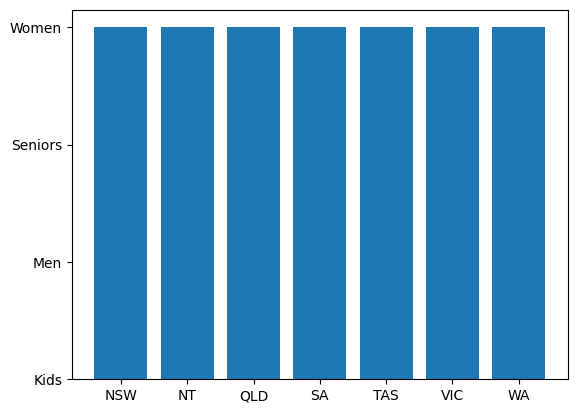

In [191]:
plt.bar(x = 'State', height = 'Group', data = state_wise);


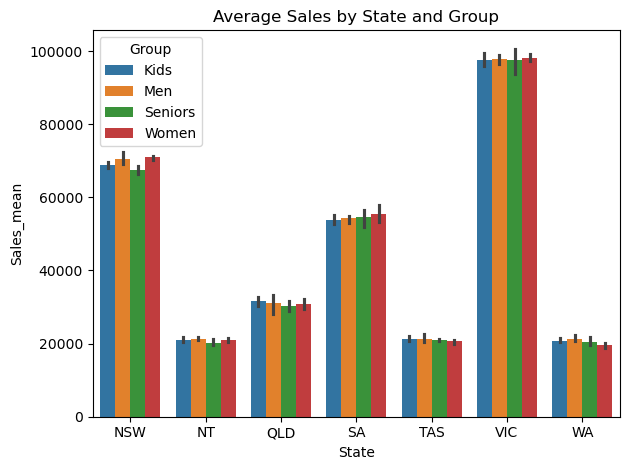

In [194]:
sns.barplot(x = 'State', y = 'Sales_mean',  hue = 'Group', data = state_wise);
plt.title('Average Sales by State and Group')
plt.tight_layout()
plt.show()